## Streamflow Analysis and Visualizations

### 1. Load the Streamflow Data

In [1]:
# Import necessary modules and the postprocessing library

import sys
import pandas as pd
sys.path.append("../../../")
import glob
from natsort import natsorted


from postprocessinglib.evaluation import data, metrics, visuals
from postprocessinglib.utilities import _helper_functions as hlp

In [2]:
# Define the input path and organize them

folder = r'C:\Users\udenzeU\OneDrive - EC-EC\Fuad_Mesh_Dataset\CanRCM_runs' ## new line
start_dates = [pd.to_datetime('1990-01-01'), pd.to_datetime('2026-01-01'), pd.to_datetime('2071-01-01')]
end_dates = [pd.to_datetime('2010-12-31'), pd.to_datetime('2055-12-31'), pd.to_datetime('2100-12-31')]

# Extract list of CSV files
csv_files = glob.glob(f"{folder}/**/MESH_output_streamflow.csv")
csv_files = natsorted(csv_files)

In [3]:
# Load the Streamflow data using the `generate_dataframes` function 

DATAFRAMES = data.generate_dataframes(csv_fpaths=csv_files)
for key, value in DATAFRAMES.items():
    print(f"{key}")
for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value.head()}")

The start date for the Data is 1990-10-01
DF_1
DF_2
DF_3
DF_4
DF_5
DF_6
DF_OBSERVED
DF_SIMULATED_1
DF_SIMULATED_2
DF_SIMULATED_3
DF_SIMULATED_4
DF_SIMULATED_5
DF_SIMULATED_6
DF_MERGED
DF_1:
            QOMEAS1    QOSIM1  QOMEAS2    QOSIM2  QOMEAS3    QOSIM3  QOMEAS4  \
1990-10-01     10.6  18.81220      NaN  2.017267    0.593  0.471522     7.70   
1990-10-02     10.8  18.51336      NaN  1.686926    0.777  0.466355     8.11   
1990-10-03     11.1  18.35229      NaN  1.599513    0.697  0.426448     7.74   
1990-10-04     11.0  18.30125      NaN  1.680425    0.668  0.385862     7.43   
1990-10-05     26.8  18.06379      NaN  1.764025    0.627  0.335419     8.07   

              QOSIM4  QOMEAS5    QOSIM5  ...  QOMEAS50   QOSIM50  QOMEAS51  \
1990-10-01  39.71715     2.89  5.233493  ...       NaN  0.067004     0.129   
1990-10-02  36.69350     2.93  4.991893  ...       NaN  0.073589     0.150   
1990-10-03  34.88419     2.70  4.767472  ...       NaN  0.079277     0.197   
1990-10-04  34.04

### 2. Process and Aggregate the Data

In [4]:
merged = DATAFRAMES["DF_MERGED"]
print(merged.head(10)) # Let's see what is looks like

# Use the long term seasonal aggregation to aggregate the data by time period into a single year time period

lt_mean_1990_2010 = data.long_term_seasonal(merged.loc[start_dates[0]: end_dates[0]], 'mean')
print(lt_mean_1990_2010)

lt_mean_2026_2055 = data.long_term_seasonal(merged.loc[start_dates[1]: end_dates[1]], 'mean')
print(lt_mean_2026_2055)

lt_mean_2071_2100 = data.long_term_seasonal(merged.loc[start_dates[2]: end_dates[2]], 'mean')
print(lt_mean_2071_2100)

           Station1                                                    \
             QOMEAS    QOSIM1    QOSIM2    QOSIM3    QOSIM4    QOSIM5   
1990-10-01     10.6  18.81220  18.82299  18.81733  18.81468  18.81892   
1990-10-02     10.8  18.51336  18.72746  18.51571  18.63782  18.67601   
1990-10-03     11.1  18.35229  18.70900  18.28233  18.49831  18.67621   
1990-10-04     11.0  18.30125  18.75058  18.00542  18.10607  18.62771   
1990-10-05     26.8  18.06379  18.57560  17.74772  17.75610  18.33330   
1990-10-06     32.3  17.88546  18.19083  17.55242  17.61585  18.02880   
1990-10-07     22.2  17.70854  17.74622  17.48413  17.53787  17.93426   
1990-10-08     19.1  17.61584  17.50106  17.49782  17.37719  17.75793   
1990-10-09     18.0  17.60339  17.38908  17.56804  17.27410  17.53244   
1990-10-10     18.7  17.58252  17.30749  17.56341  17.18378  17.33812   

                     Station2                      ... Station53            \
              QOSIM6   QOMEAS    QOSIM1    QO

       Station1                                                         \
         QOMEAS     QOSIM1     QOSIM2     QOSIM3     QOSIM4     QOSIM5   
jday                                                                     
1      9.497436  11.581862  10.354240   9.274994  12.612843  11.710418   
2      9.467179  11.296332  10.332833   9.328039  12.760337  11.282132   
3      9.518974  11.058306  10.452156   9.151275  12.247396  10.917497   
4      9.554872  11.146149  10.342944   9.065909  11.804737  10.587664   
5      9.501026  11.100729  10.447961   8.979059  11.923177  10.362997   
...         ...        ...        ...        ...        ...        ...   
362   10.680750  12.756324  11.683511   9.688269  12.870923  11.329784   
363   10.861500  12.530487  11.239175   9.806731  12.567685  11.026859   
364   10.468750  12.353217  10.676666   9.538857  12.259529  10.966772   
365   10.152250  12.044333  10.442994   9.391621  12.291368  11.508266   
366   10.871000  10.502868  11.166293 

In [5]:
# Use the statistics aggregation to aggregate the multiple model simulations into maximum, median and minimum values per time period per station

min_1990_2010     = data.stat_aggregate(lt_mean_1990_2010, 'min')
max_1990_2010     = data.stat_aggregate(lt_mean_1990_2010, 'max')
median_1990_2010  = data.stat_aggregate(lt_mean_1990_2010, 'median')
# Let's see what this looks like
print(min_1990_2010)
print(max_1990_2010)
print(median_1990_2010)

# We do the same thing for the other time periods
min_2026_2055     = data.stat_aggregate(lt_mean_2026_2055, 'min')
max_2026_2055     = data.stat_aggregate(lt_mean_2026_2055, 'max')
median_2026_2055  = data.stat_aggregate(lt_mean_2026_2055, 'median')

min_2071_2100     = data.stat_aggregate(lt_mean_2071_2100, 'min')
max_2071_2100     = data.stat_aggregate(lt_mean_2071_2100, 'max')
median_2071_2100  = data.stat_aggregate(lt_mean_2071_2100, 'median')

      Station1  Station2  Station3   Station4  Station5   Station6  Station7  \
           MIN       MIN       MIN        MIN       MIN        MIN       MIN   
jday                                                                           
1     6.329358  0.433963  0.005967  13.416614  2.642453  13.954072  0.000863   
2     6.272638  0.430830  0.005810  13.317578  2.630690  13.851633  0.000828   
3     6.214155  0.427641  0.005658  13.215868  2.617990  13.745751  0.000795   
4     6.157008  0.424554  0.005513  13.112881  2.605905  13.629465  0.000764   
5     6.098863  0.421523  0.005376  13.033418  2.588094  13.516563  0.000932   
...        ...       ...       ...        ...       ...        ...       ...   
362   6.559302  0.448137  0.006684  13.820552  2.752976  14.424254  0.001061   
363   6.503955  0.444373  0.006527  13.670305  2.704638  14.293511  0.001014   
364   6.445303  0.440619  0.006405  13.547787  2.660635  14.175765  0.000970   
365   6.396284  0.437201  0.006232  13.5

### 3. Visualize the Streamflow data

In [6]:
# Extract the stations you want to plot 
stations = ["Station6", "Station20", "Station27", "Station33", "Station46"]

# Because we have 3 time periods, let us write the lines and bounds into lists so its easier to follow
lines_to_plot = [median_1990_2010.loc[:, median_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MEDIAN")],
                 median_2026_2055.loc[:, median_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MEDIAN")],
                 median_2071_2100.loc[:, median_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MEDIAN")]]

# and now for the bounds
#upper
ubounds_list = [max_1990_2010.loc[:, max_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MAX")],
                max_2026_2055.loc[:, max_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MAX")],
                max_2071_2100.loc[:, max_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MAX")]]
#lower
lbounds_list = [min_1990_2010.loc[:, min_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MIN")],
                min_2026_2055.loc[:, min_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MIN")],
                min_2071_2100.loc[:, min_1990_2010.columns.map(lambda x: x[0] in stations and x[1] == "MIN")]]

Number of linestyles provided is less than the minimum required. Number of Lines : 3. Number of linestyles provided is:  1. Defaulting to solid lines (-)


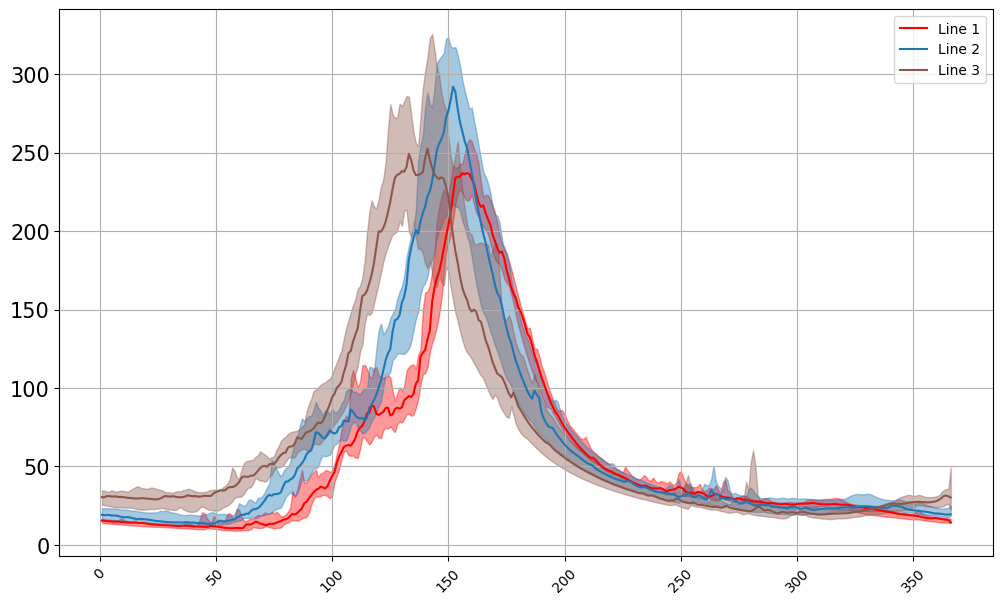

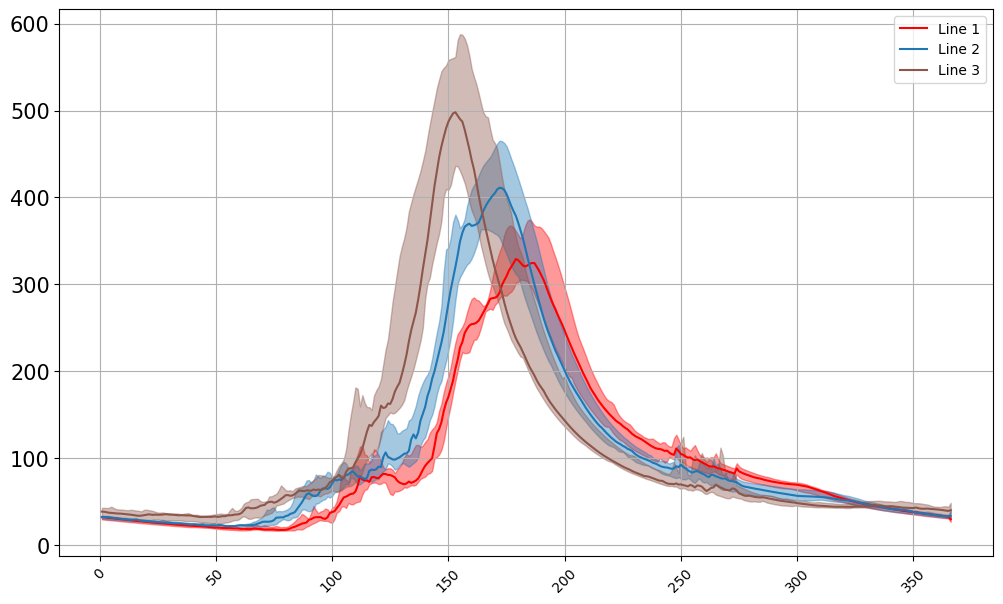

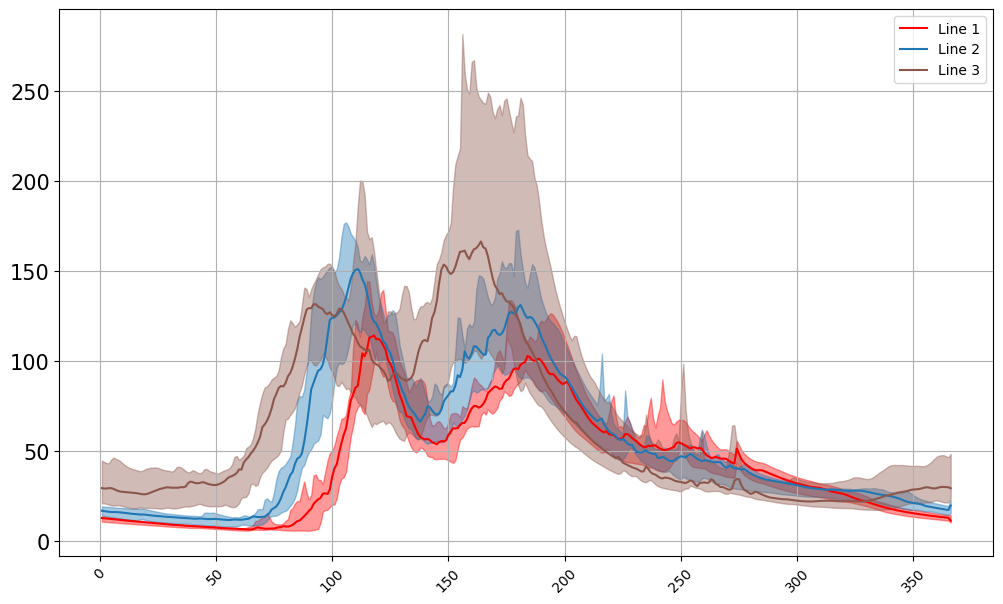

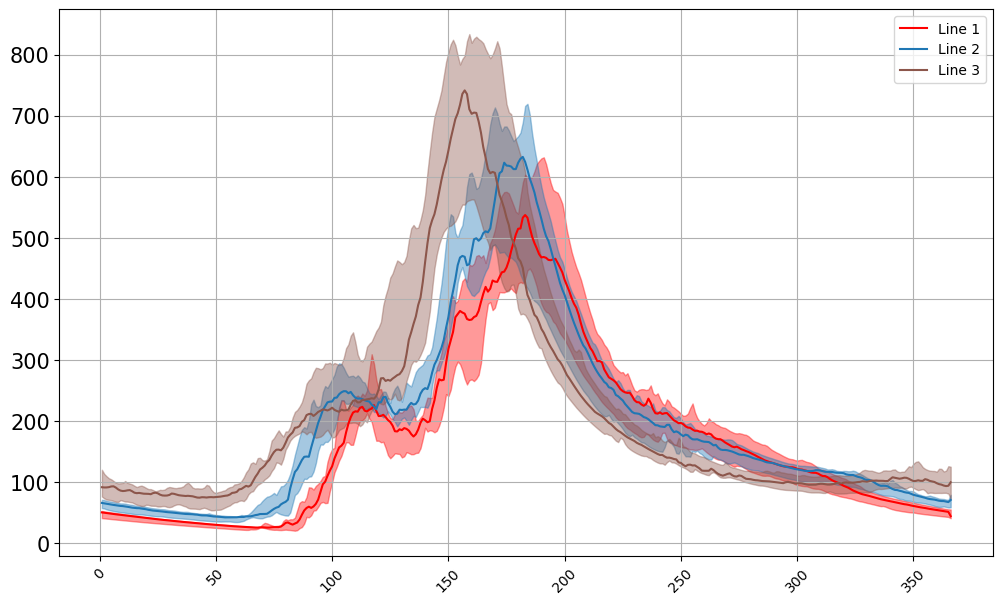

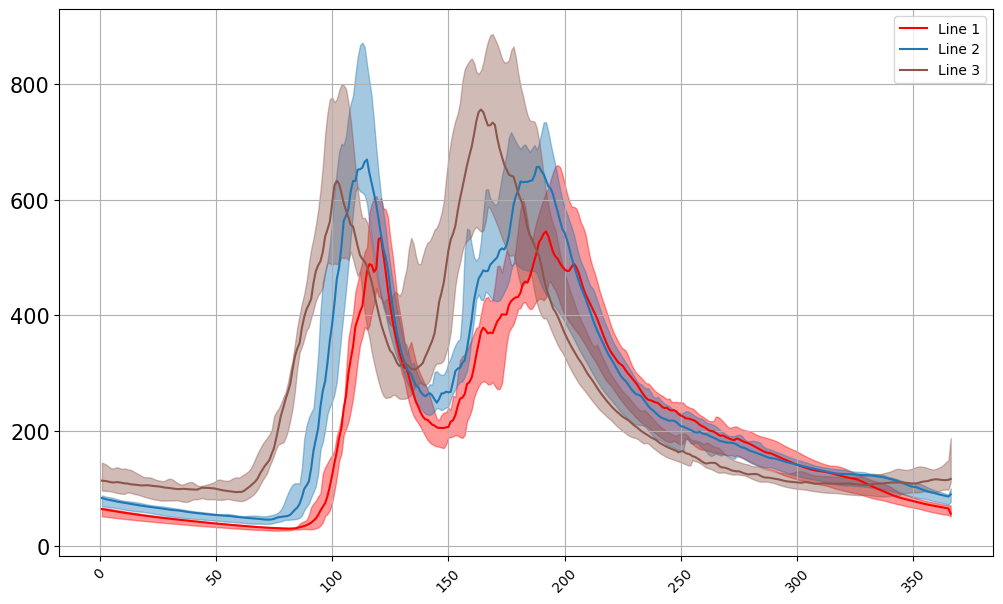

In [7]:
# Now that we have extracted out lines and bounds, let us plot the graps using the bounded plot function
visuals.bounded_plot(
    lines = lines_to_plot, 
    upper_bounds = ubounds_list,
    lower_bounds = lbounds_list,
    grid=True,
)

# The function has a bunch of default colors, transparencies and legends, thus we can infact
# run test visuals without having to specify all the details 

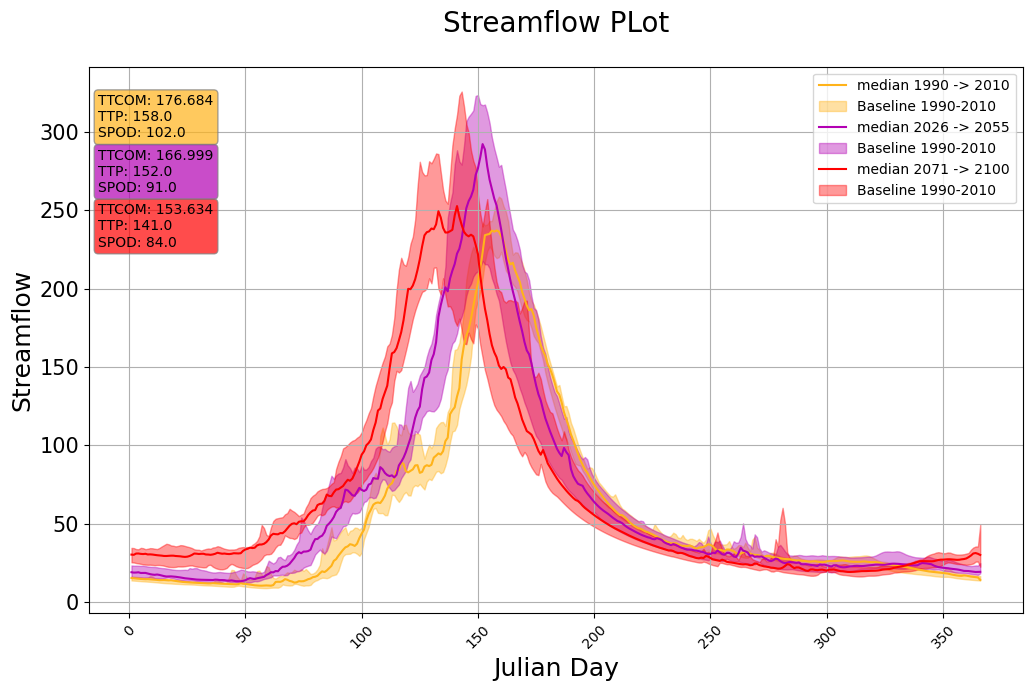

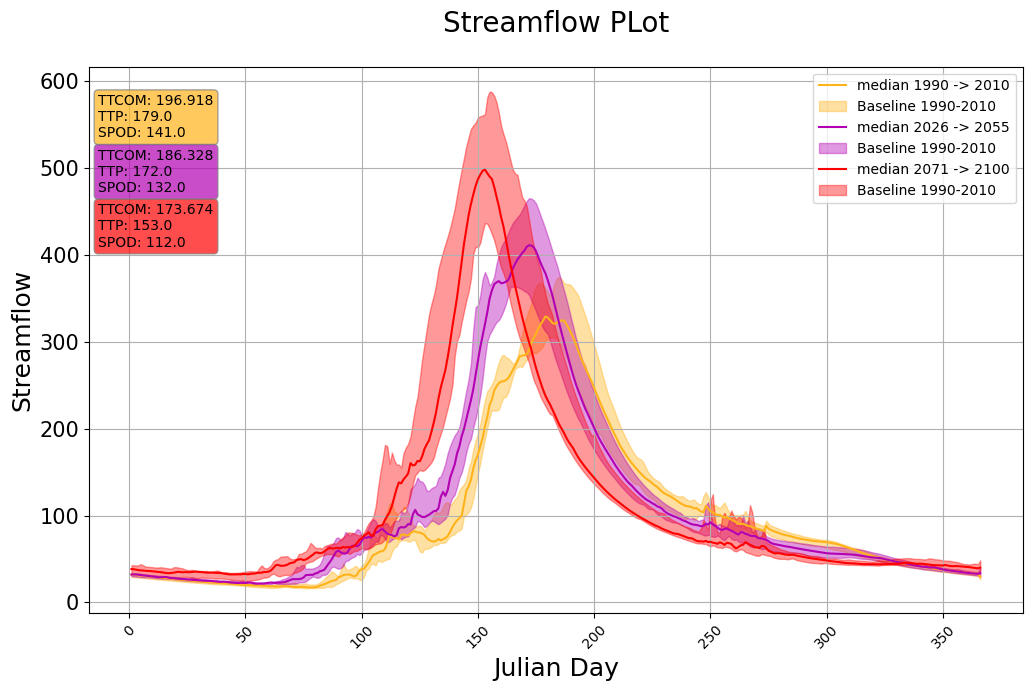

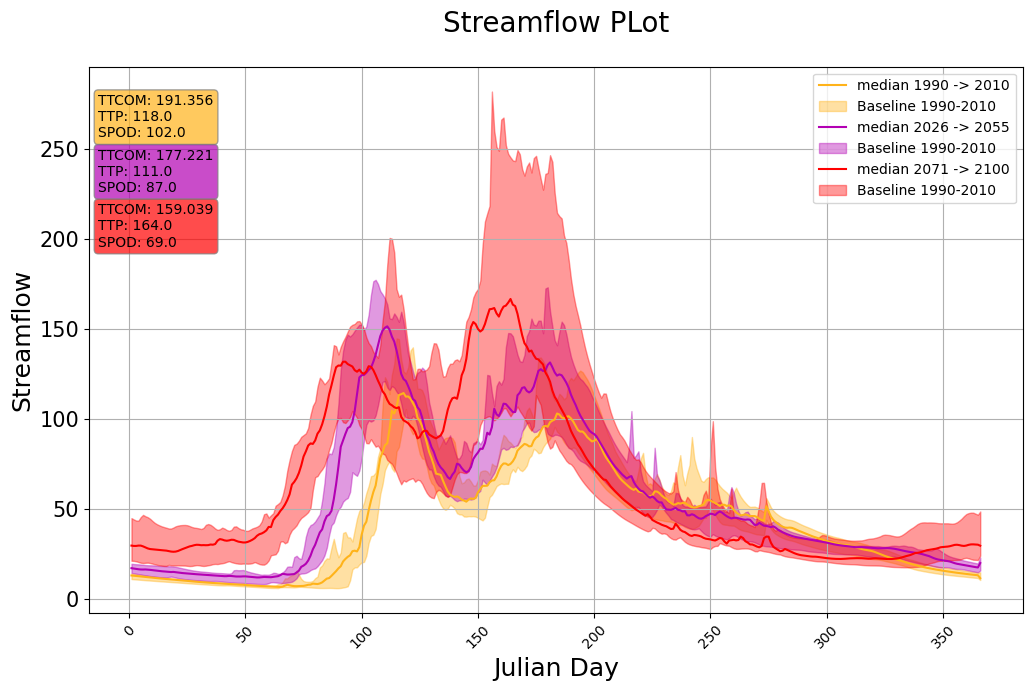

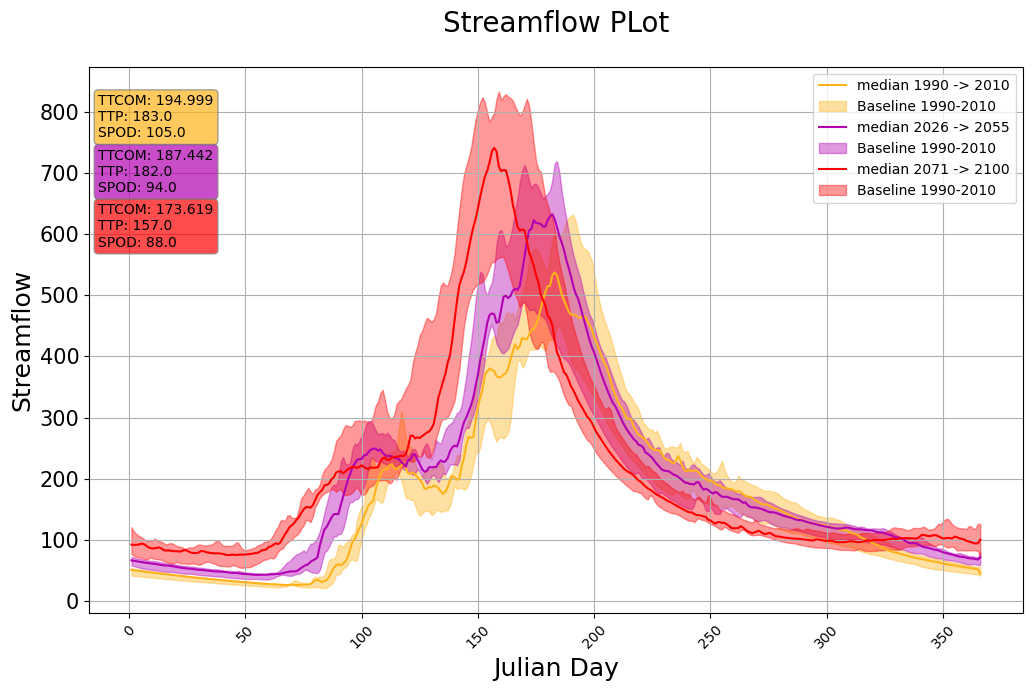

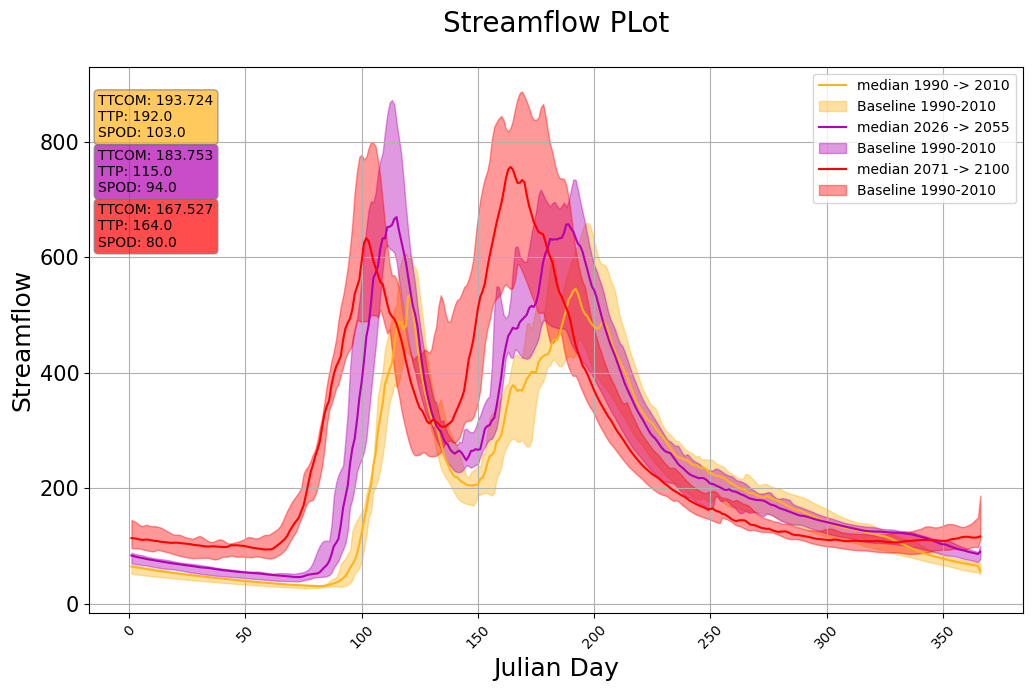

In [8]:
# Plain, simple and not a lot of Customizations. Lets change that.
# Lets add color, titles, labels, legends and display a few metrics

visuals.bounded_plot(
    lines = lines_to_plot, 
    upper_bounds = ubounds_list,
    lower_bounds = lbounds_list,
    linestyles=['(1.00, 0.70, 0.10)-', '(0.70, 0.00, 0.70)-', '(1.00, 0.00, 0.00)-'],
    labels=['Julian Day', 'Streamflow'],
    legend = ["median 1990 -> 2010", "median 2026 -> 2055", "median 2071 -> 2100"],
    bound_legend=["Baseline 1990-2010", "2026-2055", "2071-2100"],
    metrices= ["TTCOM", "TTP", "SPOD"],
    grid=True,
    transparency = [0.4],
    title = 'Streamflow PLot'
)

## Forecast Visualization

In [9]:
import json
from postprocessinglib.forecast import forecast

 The list of stations can be extraxted from the json file that contains the station information, including its latitude, longitude and its identification nummber amongst other things.

In [10]:
json_file = '../../../postprocessinglib/forecast/available_stations.json'
# Load the JSON file
with open(json_file, 'r') as f:
    dt = json.load(f)

# Extract station numbers
station = [feature['properties']['STATION_NUMBER'] for feature in dt['features']]

# Print or use the list
print(station)

['05AA024', '05AC003', '05AD007', '05AG006', '05AJ001', '05BB001', '05BG010', '05BH004', '05BL024', '05BN012', '05CA009', '05CB001', '05CC002', '05CE001', '05CK004', '05DB006', '05DC001', '05DF001', '05EF001', '05FA001', '05FE004', '05GG001', '05HD039', '05HG001', '05KD003', '05KJ001']


Using the MESH-Scripts_pylib LIbrary, we are able to obtain the real-time data from "https://api.weather.gc.ca/". This Library should already be installed in your conda environment if you followed the steps from the documentation page.

In [11]:
from datetime import datetime, timezone
from dateutil.relativedelta import relativedelta
from GeneralProcessing.gen_streamflow_file import GenStreamflowFile
gen_flow = GenStreamflowFile()


end_dt = datetime.now(timezone.utc).replace(microsecond=0) # Get the time today, right now as the end date.
start_dt = end_dt - relativedelta(months=1) # set the start date to a be a month into the past i.e., past 1 month data
start = start_dt.strftime("%Y-%m-%dT%H:%M:%SZ")
end   = end_dt.strftime("%Y-%m-%dT%H:%M:%SZ")
df_rt, meta_rt = gen_flow.fetch_hydrometric_realtime_full_range(
    station_numbers=station, 
    start=start, end=end,
    window_days=1, freq_hours=12
)

Window 2025-06-17–2025-06-18 in 4.8s
Window 2025-06-18–2025-06-19 in 5.4s
Window 2025-06-19–2025-06-20 in 4.6s
Window 2025-06-20–2025-06-21 in 4.7s
Window 2025-06-21–2025-06-22 in 4.5s
Window 2025-06-22–2025-06-23 in 4.5s
Window 2025-06-23–2025-06-24 in 4.7s
Window 2025-06-24–2025-06-25 in 4.6s
Window 2025-06-25–2025-06-26 in 4.9s
Window 2025-06-26–2025-06-27 in 4.6s
Window 2025-06-27–2025-06-28 in 4.5s
Window 2025-06-28–2025-06-29 in 4.6s
Window 2025-06-29–2025-06-30 in 4.6s
Window 2025-06-30–2025-07-01 in 4.6s
Window 2025-07-01–2025-07-02 in 4.6s
Window 2025-07-02–2025-07-03 in 4.8s
Window 2025-07-03–2025-07-04 in 4.6s
Window 2025-07-04–2025-07-05 in 4.8s
Window 2025-07-05–2025-07-06 in 4.6s
Window 2025-07-06–2025-07-07 in 4.6s
Window 2025-07-07–2025-07-08 in 4.8s
Window 2025-07-08–2025-07-09 in 4.9s
Window 2025-07-09–2025-07-10 in 4.6s
Window 2025-07-10–2025-07-11 in 4.6s
Window 2025-07-11–2025-07-12 in 4.7s
Window 2025-07-12–2025-07-13 in 9.9s
Window 2025-07-13–2025-07-14 in 4.7s
W

C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{freq_hours}H")
C:\Users\udenzeU\AppData\Local\anaconda3\envs\postprocessing\Lib\site-packages\GeneralProcessing\gen_streamflow_file.py:420: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample(f"{fre

In [12]:
df_rt

,05AA024,05AC003,05AD007,05AG006,05AJ001,05BB001,05BG010,05BH004,05BL024,05BN012,...,05DC001,05DF001,05EF001,05FA001,05FE004,05GG001,05HD039,05HG001,05KD003,05KJ001
DateTime,,,,,,,,,,,,,,,,,,,,,
2025-06-17 12:00:00+00:00,61.411111,2.540000,25.255556,27.233333,80.411111,96.866667,1.818889,168.444444,11.288889,66.577778,...,156.000000,222.000000,245.222222,0.445222,NaN,179.333333,0.730667,78.688889,502.555556,417.222222
2025-06-18 00:00:00+00:00,61.164583,2.630208,23.875000,26.704861,74.856944,94.234028,1.862222,166.548611,11.203472,67.351389,...,134.215278,244.027778,217.208333,0.694910,NaN,177.375000,0.778312,78.643056,232.076389,416.909722
2025-06-18 12:00:00+00:00,54.654167,2.871250,23.320833,27.892361,85.886806,92.716667,1.877153,162.840278,10.729167,60.918056,...,148.805556,223.722222,183.055556,0.438132,2.562059,182.083333,0.806007,74.471528,261.939394,413.923611
2025-06-19 00:00:00+00:00,50.554861,3.547500,23.082639,26.683333,92.995833,90.681944,1.895139,164.527778,10.145000,78.986111,...,143.979167,193.652778,182.222222,0.435931,1.846970,189.500000,0.690146,77.045139,271.270833,414.020833
2025-06-19 12:00:00+00:00,43.897917,3.674931,23.524306,25.926389,90.913889,91.834028,1.897500,178.402778,9.867500,100.663194,...,145.409722,280.381944,197.270833,0.450903,2.124444,191.611111,0.600111,75.831250,282.506944,418.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-15 12:00:00+00:00,49.093750,2.851597,38.023611,31.093750,42.345833,86.554167,8.537986,184.201389,43.906250,22.302778,...,142.576389,239.097222,181.798611,0.242097,1.250347,201.506944,0.903076,76.628472,288.131944,416.277778
2025-07-16 00:00:00+00:00,45.126389,1.638889,39.287500,33.070833,44.018750,80.931944,6.513889,188.916667,55.697917,54.652083,...,138.722222,280.750000,182.645833,0.219493,1.218889,196.916667,1.020153,76.188889,370.256944,415.833333
2025-07-16 12:00:00+00:00,40.736806,1.448889,39.377083,43.997917,44.621528,77.092361,5.662431,170.847222,54.083333,121.217361,...,136.048611,248.826389,192.833333,0.186201,1.207222,199.791667,1.248333,72.905556,350.243056,411.194444


From the forecast library, obtain the predicted data for the next 7 days as available from "https://geo.weather.gc.ca"

In [13]:
layer_name = 'DHPS_1km_RiverDischarge'
sim_rt = forecast.main(
    auth_path='../../../postprocessinglib/config.cfg',
    stn_list=station,
    layer_name=layer_name, 
    stn_locs_file=json_file
)

INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AA024; iteration: 0
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AC003; iteration: 1
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AD007; iteration: 2
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AG006; iteration: 3
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05AJ001; iteration: 4
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BB001; iteration: 5
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BG010; iteration: 6
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BH004; iteration: 7
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05BL024; iteration: 8
INFO:postprocessinglib.forecast.forecast:Finished forecast queries for station: 05

In [14]:
sim_rt

,05AA024_sim,05AC003_sim,05AD007_sim,05AG006_sim,05AJ001_sim,05BB001_sim,05BG010_sim,05BH004_sim,05BL024_sim,05BN012_sim,...,05DC001_sim,05DF001_sim,05EF001_sim,05FA001_sim,05FE004_sim,05GG001_sim,05HD039_sim,05HG001_sim,05KD003_sim,05KJ001_sim
time,,,,,,,,,,,,,,,,,,,,,
2025-07-17 13:00:00,38.536209,3.827139,34.790276,46.616779,71.308434,72.068626,5.064360,147.946320,47.274136,181.918381,...,118.635315,416.124664,219.548630,0.205262,1.149559,227.342163,1.191360,75.389702,107.638840,402.987122
2025-07-17 14:00:00,33.235443,3.792018,36.556210,46.140297,65.014114,71.947044,5.052001,155.347885,47.905396,182.907898,...,121.931244,414.306732,213.343674,0.212206,1.157771,224.350250,1.266637,75.042007,188.243393,409.697632
2025-07-17 15:00:00,31.169443,3.762463,37.405418,46.072823,64.311531,71.830147,5.038063,153.905441,47.975796,184.852844,...,123.313828,411.774200,212.157990,0.222334,1.165875,223.692841,1.295429,74.586639,215.871597,412.712097
2025-07-17 16:00:00,29.400333,3.743784,38.269588,46.040115,63.998966,71.720390,5.021336,151.909302,48.061707,186.726822,...,124.452797,409.057404,210.935562,0.233568,1.173715,223.115265,1.323511,74.064102,242.599075,415.356964
2025-07-17 17:00:00,28.041620,3.736362,39.148972,46.033997,63.633976,71.619164,5.002313,150.725266,48.156689,188.530945,...,125.665771,406.162292,209.703552,0.245767,1.181885,222.577347,1.353381,73.499031,268.791626,417.465027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-23 08:00:00,33.101448,28.418447,82.474289,117.161354,431.562927,65.825020,3.635226,119.270393,29.176800,369.766479,...,150.680084,295.855499,237.970093,3.336959,3.627626,253.784744,1.595072,87.059875,316.441559,422.613892
2025-07-23 09:00:00,33.100918,28.400412,81.588768,121.847595,431.660034,65.939857,3.658877,119.086105,29.116564,371.447144,...,150.272171,296.240570,240.115784,3.450486,3.646957,254.484512,1.590043,87.020348,316.650970,427.125610
2025-07-23 10:00:00,33.092022,28.375034,80.692207,125.880234,431.764832,66.054672,3.681531,118.936943,29.075798,373.061157,...,149.866226,296.747223,242.407547,3.552784,3.665551,254.920456,1.584936,86.972351,316.655640,430.993500


In [15]:
# convert the index to UTC to align with the real-time data that was requested
simcopy = sim_rt.copy()
simcopy.index = simcopy.index.tz_localize('UTC')
simcopy = simcopy.resample('12h').mean()
simcopy

,05AA024_sim,05AC003_sim,05AD007_sim,05AG006_sim,05AJ001_sim,05BB001_sim,05BG010_sim,05BH004_sim,05BL024_sim,05BN012_sim,...,05DC001_sim,05DF001_sim,05EF001_sim,05FA001_sim,05FE004_sim,05GG001_sim,05HD039_sim,05HG001_sim,05KD003_sim,05KJ001_sim
time,,,,,,,,,,,,,,,,,,,,,
2025-07-17 12:00:00+00:00,29.098280,3.746931,39.980194,46.277817,64.463203,71.594948,4.970856,148.721832,48.235645,190.317032,...,127.520020,402.588959,209.009460,0.262608,1.192849,222.466217,1.385204,72.819778,263.981171,415.006256
2025-07-18 00:00:00+00:00,27.089783,3.541276,48.822910,49.526508,63.112259,71.357544,4.584037,123.053986,47.709042,214.922653,...,141.978973,374.405426,198.947510,0.428098,1.313637,217.379776,1.729125,71.381851,323.511932,390.423462
2025-07-18 12:00:00+00:00,27.709961,3.227404,58.227707,54.979389,61.787006,71.928207,3.701279,107.524963,41.432182,258.143524,...,142.274902,360.601105,197.818100,0.555940,1.465379,212.583633,1.809400,79.741051,321.627655,383.326569
2025-07-19 00:00:00+00:00,28.518066,19.154104,65.337715,54.110046,87.488121,72.025208,3.725294,109.037476,42.069485,315.658478,...,150.487747,355.215179,195.436386,0.615303,1.763436,206.676712,1.647804,97.920967,318.080597,414.997803
2025-07-19 12:00:00+00:00,29.212135,31.636545,61.915970,51.797390,193.270584,70.649040,3.591533,121.578217,49.120121,357.469879,...,192.619766,358.676300,188.133499,0.770585,2.188915,197.998032,1.482752,100.167816,313.820221,422.895294
2025-07-20 00:00:00+00:00,29.952875,24.534147,59.380680,48.780468,245.500793,68.341827,3.460170,162.522659,53.792358,379.796173,...,207.768860,342.432648,178.772232,0.940780,2.540915,189.963455,1.409921,99.016174,309.433014,412.469330
2025-07-20 12:00:00+00:00,30.621042,24.911453,80.066612,47.516857,283.645660,66.025002,3.327230,162.897034,52.563015,383.763214,...,188.672409,320.028381,168.248062,1.241090,2.890626,186.943314,1.476863,97.023773,304.813263,390.878662
2025-07-21 00:00:00+00:00,31.345167,19.603273,78.216919,54.436863,350.633087,64.496193,3.180855,145.229630,40.321625,374.615356,...,173.946121,295.922302,160.901688,2.468094,3.032043,188.978806,1.644304,94.776009,308.657257,420.748688
2025-07-21 12:00:00+00:00,31.861931,18.492954,87.000648,66.992165,403.972443,63.754349,3.159042,135.316513,33.663189,363.531708,...,171.493347,267.203735,159.663559,2.671844,3.139370,192.318466,1.738543,90.546501,311.446320,427.648834


In [16]:
# merge the two dataframes in preparation for plotting
obs = df_rt.copy()

merged_cols = []

for col1, col2 in zip(obs.columns, simcopy.columns):
    merged_cols.append(obs[col1])
    merged_cols.append(simcopy[col2])
    
merged = pd.concat(merged_cols, axis=1)
merged

,05AA024,05AA024_sim,05AC003,05AC003_sim,05AD007,05AD007_sim,05AG006,05AG006_sim,05AJ001,05AJ001_sim,...,05GG001,05GG001_sim,05HD039,05HD039_sim,05HG001,05HG001_sim,05KD003,05KD003_sim,05KJ001,05KJ001_sim
2025-06-17 12:00:00+00:00,61.411111,NaN,2.540000,NaN,25.255556,NaN,27.233333,NaN,80.411111,NaN,...,179.333333,NaN,0.730667,NaN,78.688889,NaN,502.555556,NaN,417.222222,NaN
2025-06-18 00:00:00+00:00,61.164583,NaN,2.630208,NaN,23.875000,NaN,26.704861,NaN,74.856944,NaN,...,177.375000,NaN,0.778312,NaN,78.643056,NaN,232.076389,NaN,416.909722,NaN
2025-06-18 12:00:00+00:00,54.654167,NaN,2.871250,NaN,23.320833,NaN,27.892361,NaN,85.886806,NaN,...,182.083333,NaN,0.806007,NaN,74.471528,NaN,261.939394,NaN,413.923611,NaN
2025-06-19 00:00:00+00:00,50.554861,NaN,3.547500,NaN,23.082639,NaN,26.683333,NaN,92.995833,NaN,...,189.500000,NaN,0.690146,NaN,77.045139,NaN,271.270833,NaN,414.020833,NaN
2025-06-19 12:00:00+00:00,43.897917,NaN,3.674931,NaN,23.524306,NaN,25.926389,NaN,90.913889,NaN,...,191.611111,NaN,0.600111,NaN,75.831250,NaN,282.506944,NaN,418.571429,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-21 12:00:00+00:00,NaN,31.861931,NaN,18.492954,NaN,87.000648,NaN,66.992165,NaN,403.972443,...,NaN,192.318466,NaN,1.738543,NaN,90.546501,NaN,311.446320,NaN,427.648834
2025-07-22 00:00:00+00:00,NaN,32.360729,NaN,25.622643,NaN,90.206841,NaN,73.544777,NaN,427.170502,...,NaN,195.631653,NaN,1.714299,NaN,86.617805,NaN,312.574860,NaN,412.982910
2025-07-22 12:00:00+00:00,NaN,32.688511,NaN,29.569532,NaN,88.414742,NaN,76.968369,NaN,432.582672,...,NaN,215.483810,NaN,1.655496,NaN,85.589172,NaN,312.729462,NaN,376.799225
2025-07-23 00:00:00+00:00,NaN,32.944016,NaN,28.490265,NaN,84.323212,NaN,104.609039,NaN,431.589081,...,NaN,248.739624,NaN,1.605636,NaN,86.849586,NaN,314.321930,NaN,407.817841


In [17]:
# Change the column headers to Multi-indexed headers to match the rest of the library's Dataframes.
from collections import defaultdict

def set_multiindex_columns(df):
    station_counts = defaultdict(int)
    multi_cols = []

    for col in df.columns:
        station = col.split('_')[0]
        count = station_counts[station]

        if count == 0:
            label = 'QOMEAS'
        elif count == 1 and col.endswith('_sim'):
            label = 'QOSIM'
        else:
            label = f'QOSIM{count}'

        station_counts[station] += 1
        multi_cols.append((station, label))

    # Apply MultiIndex to the DataFrame columns
    df.columns = pd.MultiIndex.from_tuples(multi_cols)
    return df

merged = set_multiindex_columns(merged)
merged

05AA024              05AC003             \
                              QOMEAS      QOSIM    QOMEAS      QOSIM   
2025-06-17 12:00:00+00:00  61.411111        NaN  2.540000        NaN   
2025-06-18 00:00:00+00:00  61.164583        NaN  2.630208        NaN   
2025-06-18 12:00:00+00:00  54.654167        NaN  2.871250        NaN   
2025-06-19 00:00:00+00:00  50.554861        NaN  3.547500        NaN   
2025-06-19 12:00:00+00:00  43.897917        NaN  3.674931        NaN   
...                              ...        ...       ...        ...   
2025-07-21 12:00:00+00:00        NaN  31.861931       NaN  18.492954   
2025-07-22 00:00:00+00:00        NaN  32.360729       NaN  25.622643   
2025-07-22 12:00:00+00:00        NaN  32.688511       NaN  29.569532   
2025-07-23 00:00:00+00:00        NaN  32.944016       NaN  28.490265   
2025-07-23 12:00:00+00:00        NaN  33.060707       NaN  28.283367   

                             05AD007               05AG006              \
                              QOMEAS      QOSIM     QOMEAS       QOSIM   
2025-06-17 12:00:00+00:00  25.255556        NaN  27.233333         NaN   
2025-06-18 00:00:00+00:00  23.875000        NaN  26.704861         NaN   
2025-06-18 12:00:00+00:00  23.320833        NaN  27.892361         NaN   
2025-06-19 00:00:00+00:00  23.082639        NaN  26.683333         NaN   
2025-06-19 12:00:00+00:00  23.524306        NaN  25.926389         NaN   
...                              ...        ...        ...         ...   
2025-07-21 12:00:00+00:00        NaN  87.000648        NaN   66.992165   
2025-07-22 00:00:00+00:00        NaN  90.206841        NaN   73.544777   
2025-07-22 12:00:00+00:00        NaN  88.414742        NaN   76.968369   
2025-07-23 00:00:00+00:00        NaN  84.323212        NaN  104.609039   
2025-07-23 12:00:00+00:00        NaN  78.886314        NaN  131.977921   

                             05AJ001              ...     05GG001              \
                              QOMEAS       QOSIM  ...      QOMEAS       QOSIM   
2025-06-17 12:00:00+00:00  80.411111         NaN  ...  179.333333         NaN   
2025-06-18 00:00:00+00:00  74.856944         NaN  ...  177.375000         NaN   
2025-06-18 12:00:00+00:00  85.886806         NaN  ...  182.083333         NaN   
2025-06-19 00:00:00+00:00  92.995833         NaN  ...  189.500000         NaN   
2025-06-19 12:00:00+00:00  90.913889         NaN  ...  191.611111         NaN   
...                              ...         ...  ...         ...         ...   
2025-07-21 12:00:00+00:00        NaN  403.972443  ...         NaN  192.318466   
2025-07-22 00:00:00+00:00        NaN  427.170502  ...         NaN  195.631653   
2025-07-22 12:00:00+00:00        NaN  432.582672  ...         NaN  215.483810   
2025-07-23 00:00:00+00:00        NaN  431.589081  ...         NaN  248.739624   
2025-07-23 12:00:00+00:00        NaN  431.957733  ...         NaN  255.126236   

                            05HD039              05HG001             \
                             QOMEAS     QOSIM     QOMEAS      QOSIM   
2025-06-17 12:00:00+00:00  0.730667       NaN  78.688889        NaN   
2025-06-18 00:00:00+00:00  0.778312       NaN  78.643056        NaN   
2025-06-18 12:00:00+00:00  0.806007       NaN  74.471528        NaN   
2025-06-19 00:00:00+00:00  0.690146       NaN  77.045139        NaN   
2025-06-19 12:00:00+00:00  0.600111       NaN  75.831250        NaN   
...                             ...       ...        ...        ...   
2025-07-21 12:00:00+00:00       NaN  1.738543        NaN  90.546501   
2025-07-22 00:00:00+00:00       NaN  1.714299        NaN  86.617805   
2025-07-22 12:00:00+00:00       NaN  1.655496        NaN  85.589172   
2025-07-23 00:00:00+00:00       NaN  1.605636        NaN  86.849586   
2025-07-23 12:00:00+00:00       NaN  1.572273        NaN  86.867744   

                              05KD003                 05KJ001              
                               QOMEAS       QOSIM      QOMEAS       QOSIM  

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 2. Number of linestyles provided is:  1. Defaulting to solid lines (-)


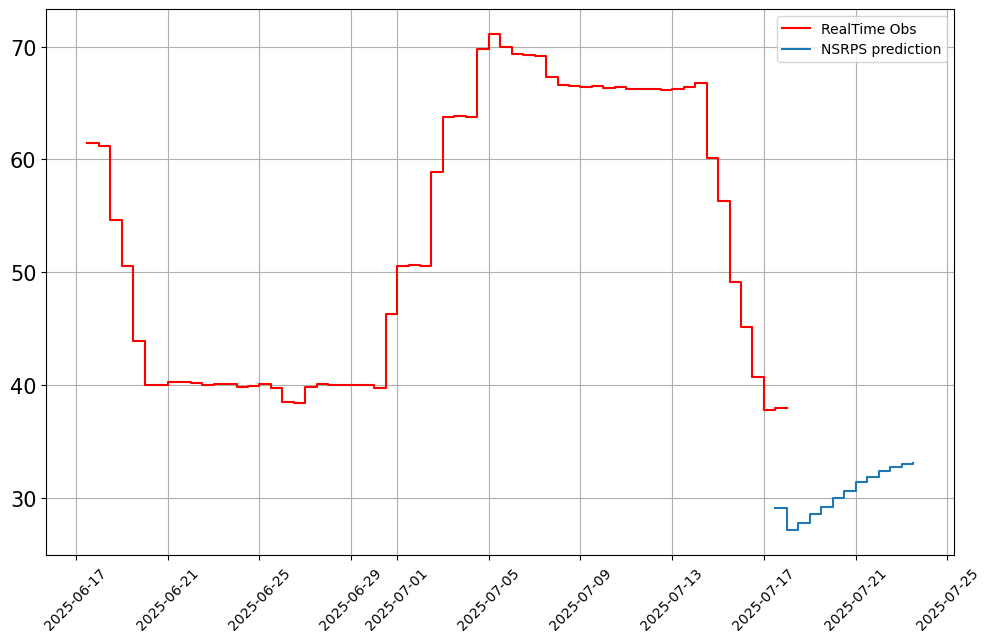

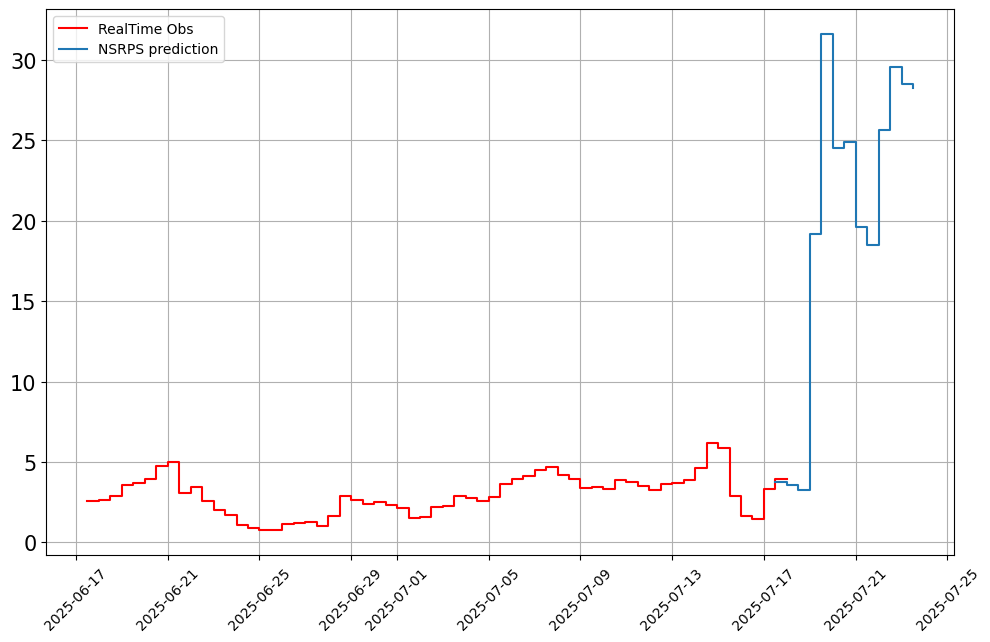

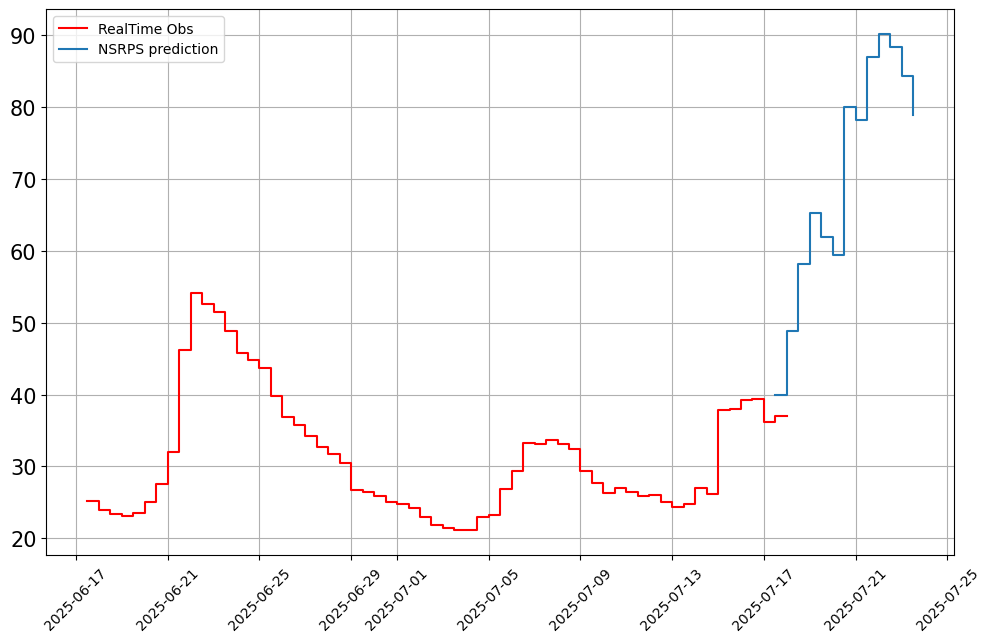

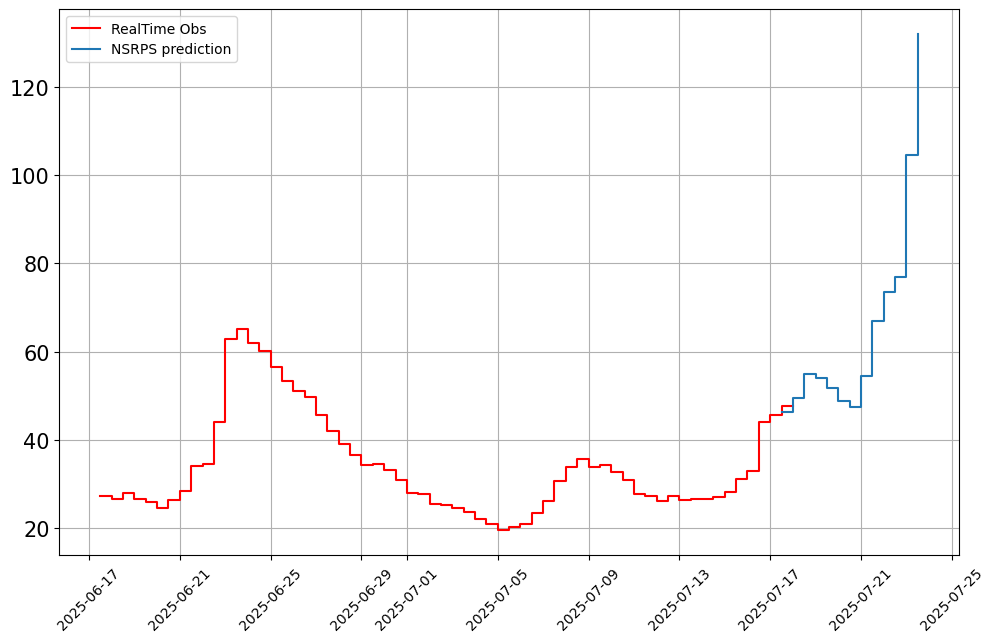

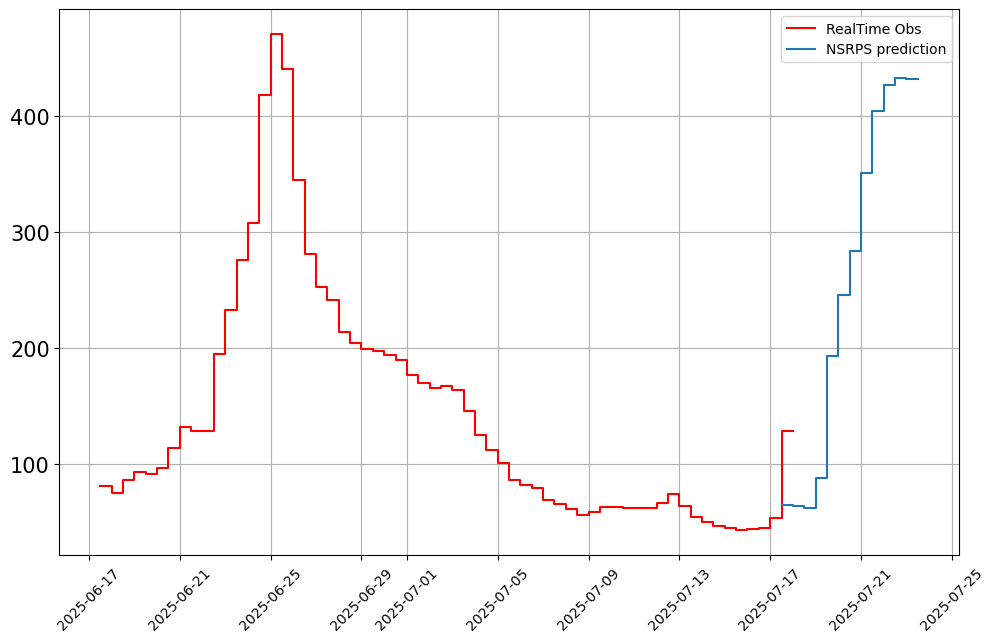

In [18]:
# Now we plot.
visuals.plot(merged_df = merged.iloc[:, :10], step = True, grid = True, legend = ["RealTime Obs", "NSRPS prediction"])

Number of simulated data columns: 1
Number of linewidths provided is less than the number of columns. Number of columns : 2. Number of linewidths provided is:  1. Defaulting to 1.5


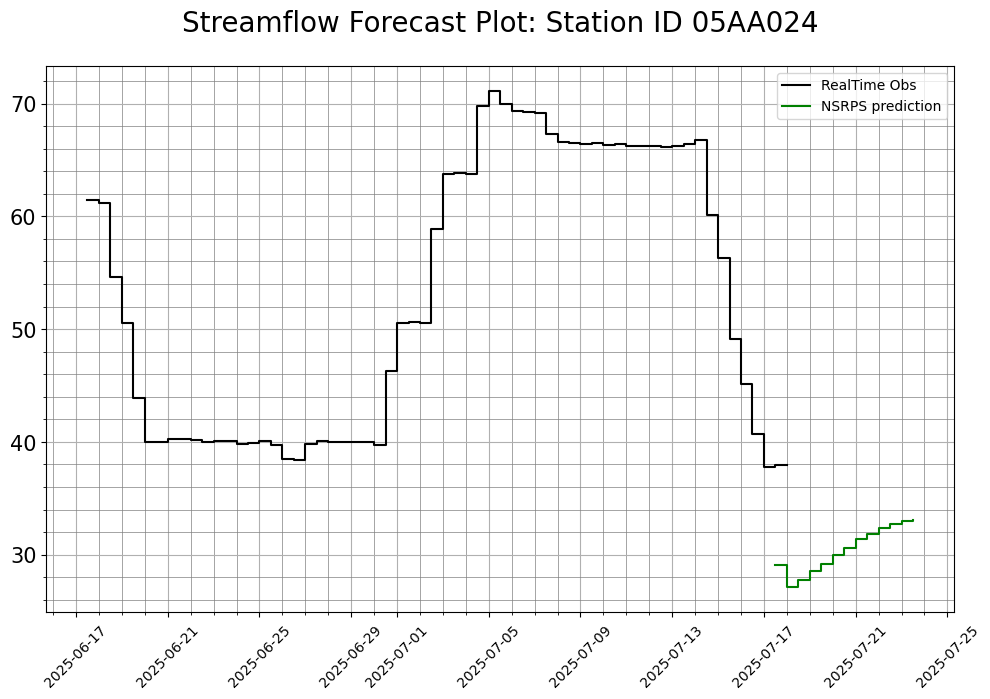

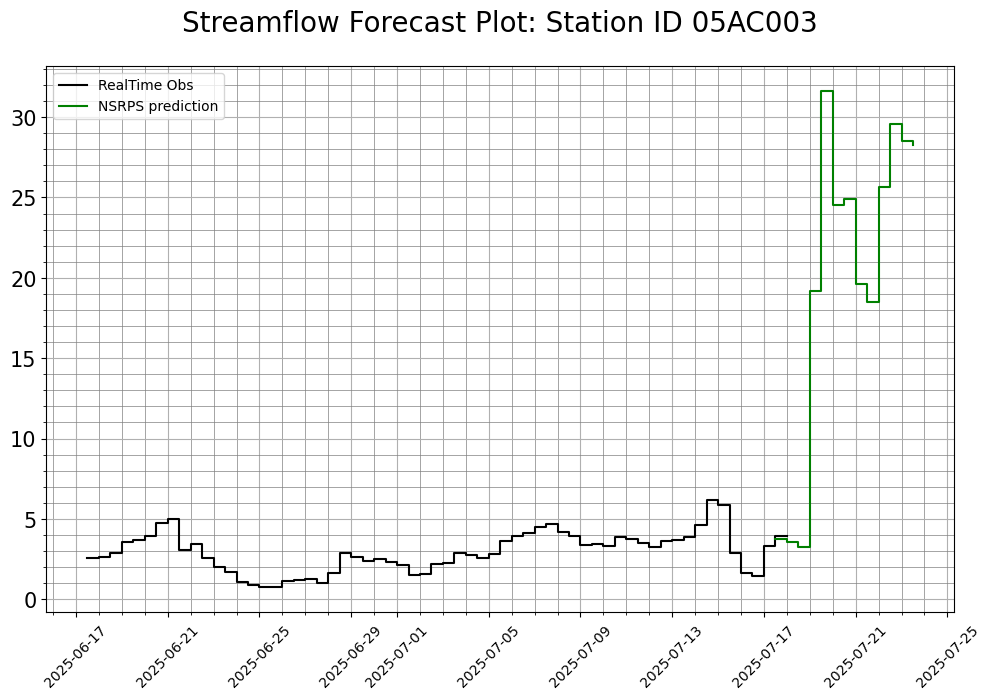

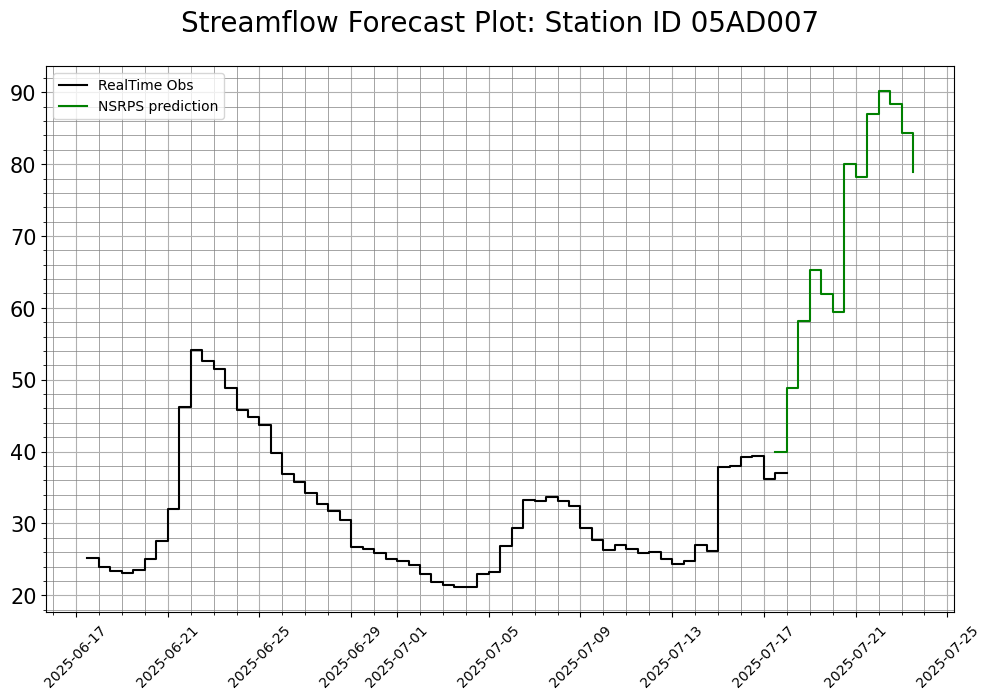

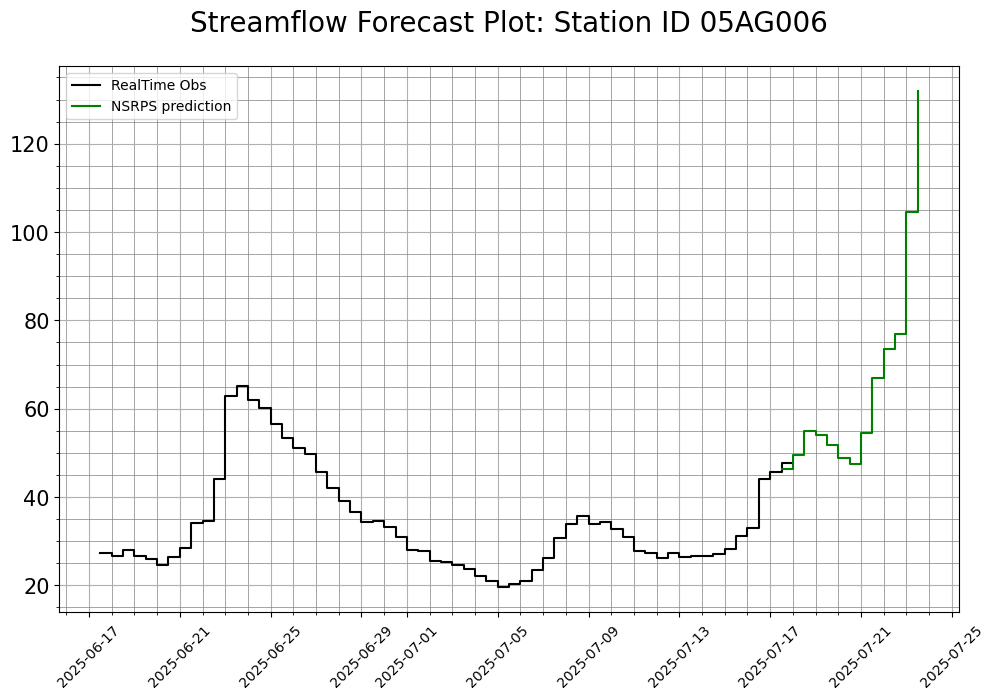

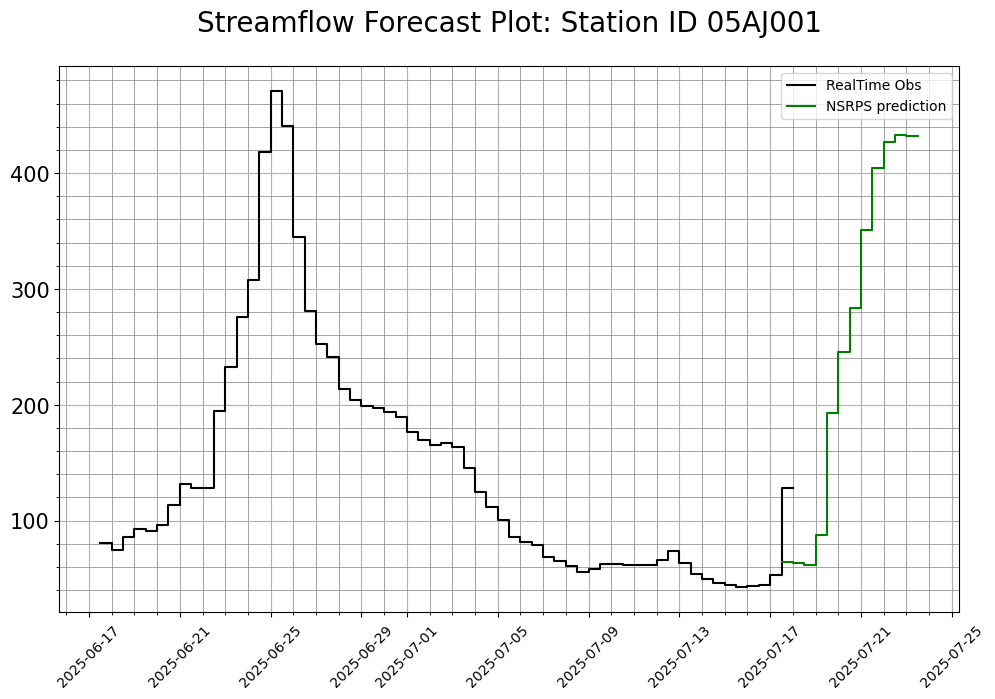

In [19]:
# Let us fill in the other plot features so that it looks exactly like we want.
visuals.plot(merged_df = merged.iloc[:, 0:10], step = True, grid = True, legend = ["RealTime Obs", "NSRPS prediction"],
             linestyles=['k-', 'g-'], minor_grid=True,
             title = [f"Streamflow Forecast Plot: Station ID {i}" for i in station[0:5]]
            )

Let us now compare this data to the historical data for this time period over the last 45 years.

Again Using the MESH-Scrpts-Pylib library,

In [20]:
start_date = "1980-01-01"
end_date   = "2024-12-12"

station_ca = station
df_ca, meta_ca = gen_flow.fetch_hydrometric_data_ca(station_ca, start_date, end_date)
df_ca

Fetched daily‐mean for 05AA024 in 7.3s
Fetched daily‐mean for 05AC003 in 7.4s
Fetched daily‐mean for 05AD007 in 8.1s
Fetched daily‐mean for 05AG006 in 7.3s
Fetched daily‐mean for 05AJ001 in 7.6s
Fetched daily‐mean for 05BB001 in 7.9s
Fetched daily‐mean for 05BG010 in 6.4s
Fetched daily‐mean for 05BH004 in 7.8s
Fetched daily‐mean for 05BL024 in 7.7s
Fetched daily‐mean for 05BN012 in 7.7s
Fetched daily‐mean for 05CA009 in 8.1s
Fetched daily‐mean for 05CB001 in 8.2s
Fetched daily‐mean for 05CC002 in 7.7s
Fetched daily‐mean for 05CE001 in 8.2s
Fetched daily‐mean for 05CK004 in 7.7s
Fetched daily‐mean for 05DB006 in 8.0s
Fetched daily‐mean for 05DC001 in 4.2s
Fetched daily‐mean for 05DF001 in 7.9s
Fetched daily‐mean for 05EF001 in 8.2s
Fetched daily‐mean for 05FA001 in 8.2s
Fetched daily‐mean for 05FE004 in 7.8s
Fetched daily‐mean for 05GG001 in 8.2s
Fetched daily‐mean for 05HD039 in 8.1s
Fetched daily‐mean for 05HG001 in 7.1s
Fetched daily‐mean for 05KD003 in 7.8s
Fetched daily‐mean for 05

,05AA024,05AC003,05AD007,05AG006,05AJ001,05BB001,05BG010,05BH004,05BL024,05BN012,...,05DC001,05DF001,05EF001,05FA001,05FE004,05GG001,05HD039,05HG001,05KD003,05KJ001
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,3.75,None,5.65,None,56.0,9.28,None,39.599998,1.75,35.0,...,None,72.300003,102.0,0.16,0.672,56.599998,0.53,164.0,158.0,309.0
1980-01-02,3.62,None,5.5,None,54.799999,9.53,None,39.599998,1.55,36.599998,...,None,62.900002,93.5,0.16,0.648,65.199997,0.53,170.0,227.0,297.0
1980-01-03,3.5,None,5.38,None,51.0,9.31,None,39.200001,1.4,38.0,...,None,67.900002,86.400002,0.16,0.624,83.400002,0.52,173.0,228.0,282.0
1980-01-04,3.4,None,5.22,None,48.099998,8.68,None,39.700001,1.22,39.5,...,None,69.699997,94.0,0.16,0.599,95.099998,0.51,165.0,164.0,263.0
1980-01-05,3.28,None,5.05,None,45.700001,7.79,None,39.700001,1.08,37.0,...,None,86.699997,92.199997,0.16,0.575,96.5,0.5,169.0,178.0,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-08,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,263.0,301.0
2024-12-09,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,242.0,316.0
2024-12-10,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,278.0,328.0


Using our Library, let us now find the seasonal long term aggregation of the data i.e., aggregate all the 45 years into 1 year.

In [21]:
# Make sure each value of the dataframe is in fact numeric
for i in station:
    df_ca[i] = pd.to_numeric(df_ca[i], errors='coerce')
    
lt_mean = data.long_term_seasonal(df=df_ca, method = 'mean')
lt_max = data.long_term_seasonal(df=df_ca, method = 'max')
lt_min = data.long_term_seasonal(df=df_ca, method = 'min')
lt_median = data.long_term_seasonal(df=df_ca , method = 'median')

lt_q95 = data.long_term_seasonal(df=df_ca , method = 'Q95')
lt_q5 = data.long_term_seasonal(df=df_ca , method = 'q5')
lt_q75 = data.long_term_seasonal(df=df_ca , method = 'Q75')
lt_q25 = data.long_term_seasonal(df=df_ca , method = 'q25')

In [22]:
print("lt_mean:\n",lt_mean)
print("lt_median:\n",lt_median)
print("lt_Q75:\n",lt_q75)
print("lt_Q5:\n",lt_q5)

lt_mean:
         05AA024   05AC003    05AD007    05AG006    05AJ001    05BB001  \
jday                                                                    
1      9.785349  0.840725  21.336136  22.416585  75.006818   9.638409   
2      9.753023  0.858775  20.686364  22.014878  75.288636   9.677045   
3      9.803721  0.853525  20.268409  22.131707  74.288636   9.704318   
4      9.835814  0.875600  20.170227  22.080976  72.884091   9.715909   
5      9.784884  0.842767  19.852954  21.791219  72.363637   9.725454   
...         ...       ...        ...        ...        ...        ...   
362   10.682558  0.814146  21.859546  23.195238  72.709091  10.025682   
363   10.858372  0.837707  22.240000  22.950000  75.097728   9.933409   
364   10.508372  0.855732  22.536136  22.960714  76.890909   9.865455   
365   10.226512  0.829707  22.306591  22.814524  76.252273   9.794545   
366   10.543636  0.780700  25.080909  18.361000  69.200000  10.389091   

       05BG010    05BH004   05BL024    0

Observe that the indexes of the aggregations are integers from 1-366 and the Real-Time and NSRPS have datetime index. We have to convert the jday indexes to UTC datetime and then extract that 37 day time frame before we can plot the data.


In [23]:
# To do this I prepared a function
def prepare_dataframes(short_term_df, long_term_df, upper_bounds_dfs, lower_bounds_dfs):
    """
    Prepare climatology DataFrames expanded to match timestamps of short_term_df,
    with separate lists of upper and lower bound DataFrames.

    Args:
      short_term_df: DataFrame with datetime index.
      long_term_df: DataFrame indexed by jday (1-366) for median or central tendency.
      upper_bounds_dfs: List of DataFrames indexed by jday (1-366) for upper bounds (e.g. q95, max, q75).
      lower_bounds_dfs: List of DataFrames indexed by jday (1-366) for lower bounds (e.g. q5, min, q25).

    Returns:
      expanded_climatology: DataFrame with same index as short_term_df (median/centerline)
      expanded_upper_bounds: List of DataFrames with same index as short_term_df (upper bounds)
      expanded_lower_bounds: List of DataFrames with same index as short_term_df (lower bounds)
    """
    
    # Extract day of year (jday) for each timestamp in short_term_df
    jdays = short_term_df.index.dayofyear

    # Map median climatology values from jday to timestamps
    expanded_climatology = long_term_df.reindex(jdays).set_index(short_term_df.index)

    # Map each upper bound climatology similarly
    expanded_upper_bounds = []
    for upper_df in upper_bounds_dfs:
        expanded_upper = upper_df.reindex(jdays).set_index(short_term_df.index)
        expanded_upper_bounds.append(expanded_upper)

    # Map each lower bound climatology similarly
    expanded_lower_bounds = []
    for lower_df in lower_bounds_dfs:
        expanded_lower = lower_df.reindex(jdays).set_index(short_term_df.index)
        expanded_lower_bounds.append(expanded_lower)

    return expanded_climatology, expanded_upper_bounds, expanded_lower_bounds

In [24]:
median, upper, lower = prepare_dataframes(merged, lt_median, [lt_max, lt_q95, lt_q75], [lt_min, lt_q5, lt_q25])
# Recall - merged is the 37 day data that we are trying to compare to
# this should extract the corresponding 37 days with UTC datetime index.

In [25]:
print("median:\n",median)

median:
                              05AA024  05AC003     05AD007     05AG006  \
2025-06-17 12:00:00+00:00  82.199997     2.50  149.000000  143.500000   
2025-06-18 00:00:00+00:00  79.900002     2.42  141.000000  137.000000   
2025-06-18 12:00:00+00:00  79.900002     2.42  141.000000  137.000000   
2025-06-19 00:00:00+00:00  81.599998     2.53  129.500000  127.500000   
2025-06-19 12:00:00+00:00  81.599998     2.53  129.500000  127.500000   
...                              ...      ...         ...         ...   
2025-07-21 12:00:00+00:00  50.200001     2.39   43.599998   49.200001   
2025-07-22 00:00:00+00:00  48.599998     2.31   37.900000   50.700001   
2025-07-22 12:00:00+00:00  48.599998     2.31   37.900000   50.700001   
2025-07-23 00:00:00+00:00  48.000000     2.30   35.700001   50.000000   
2025-07-23 12:00:00+00:00  48.000000     2.30   35.700001   50.000000   

                           05AJ001     05BB001  05BG010  05BH004    05BL024  \
2025-06-17 12:00:00+00:00    417.0 

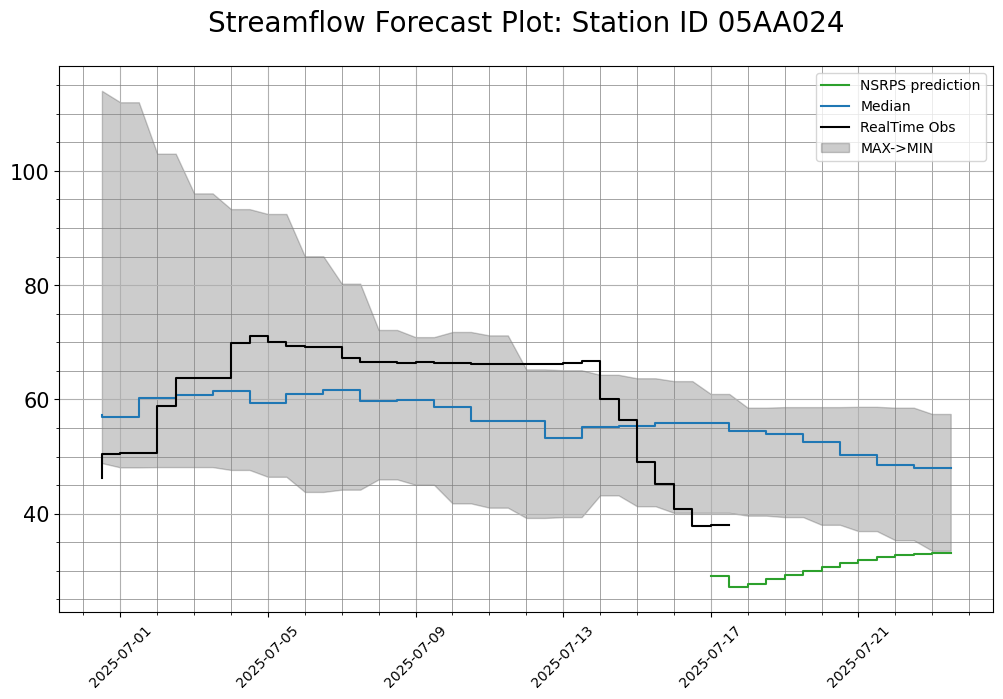

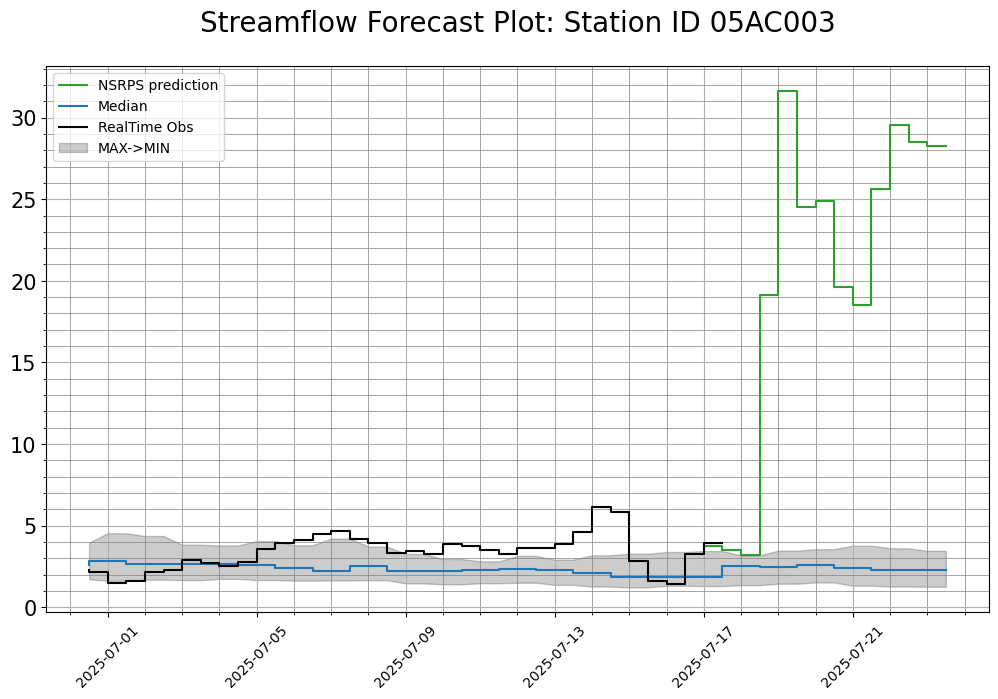

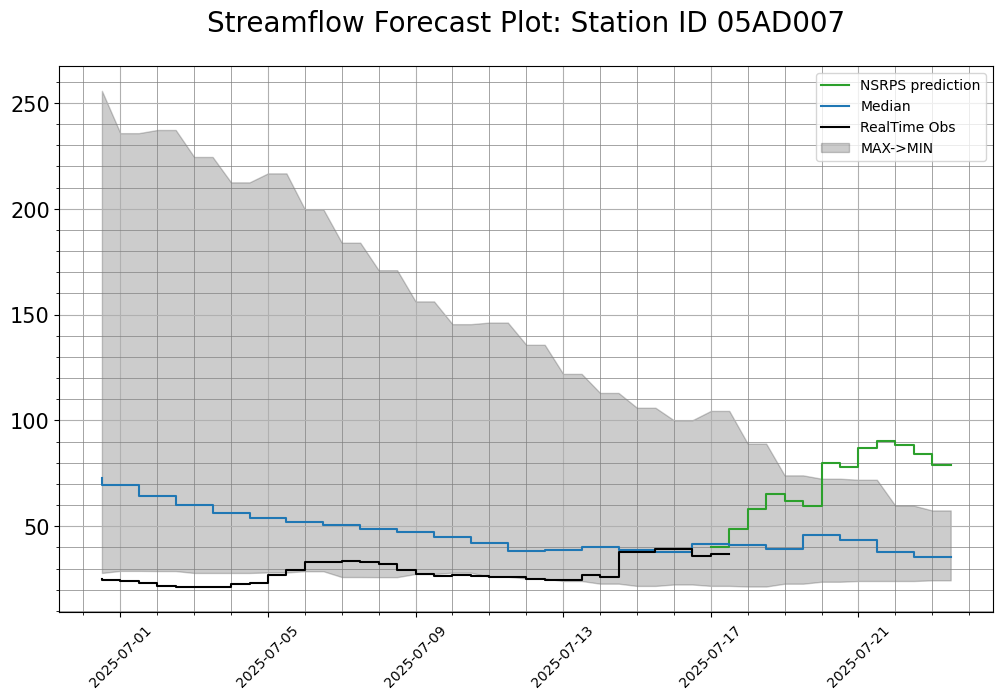

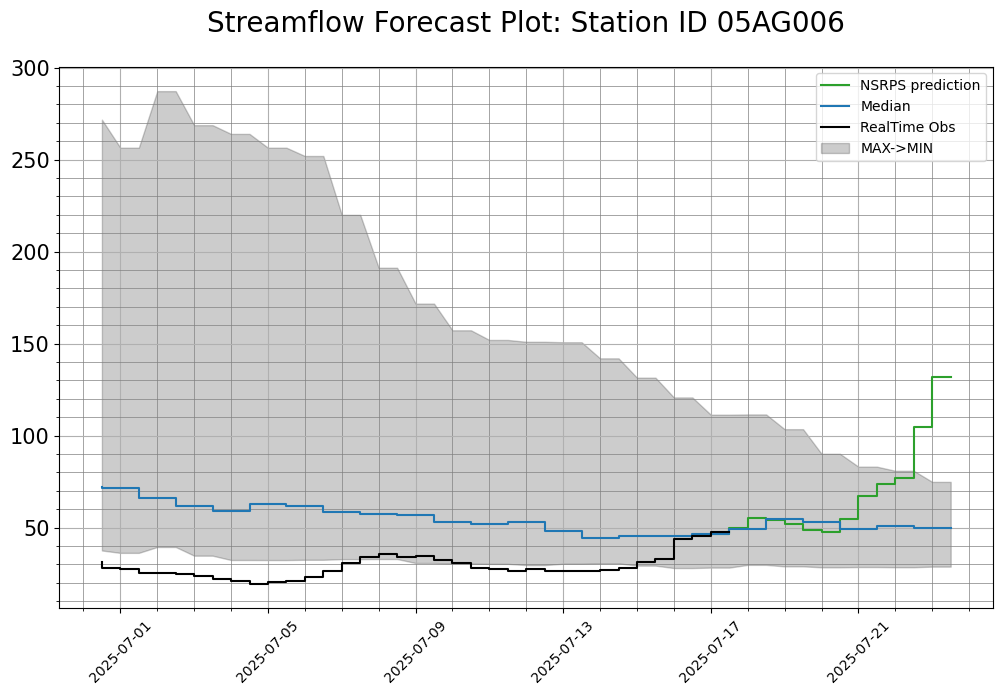

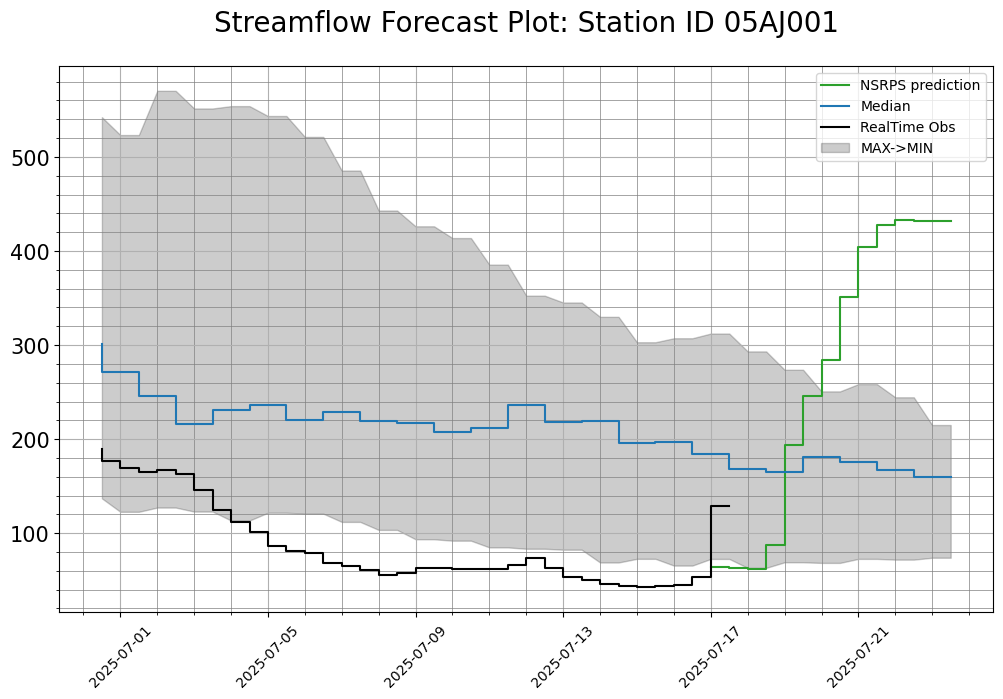

In [26]:
# Now we plot
visuals.bounded_plot(lines=merged["2025-06-30 12:00:00+00:00":].iloc[:, 0:10:2], upper_bounds=upper[2]["2025-06-30 12:00:00+00:00":], lower_bounds=lower[2]["2025-06-30 12:00:00+00:00":], extra_lines=[merged["2025-06-30 12:00:00+00:00":].iloc[:, 1:10:2], median["2025-06-30 12:00:00+00:00":]],
                     grid = True, minor_grid =True, step = True, legend = ["NSRPS prediction","Median", "RealTime Obs"], bound_legend= ["MAX->MIN","Q95->Q5","Q75->Q25"],
                     linestyles=("(0.173, 0.628, 0.173)-","(0.122, 0.467, 0.706)-", "(0.00, 0.00, 0.00)-"), transparency = [0.2], title = [f"Streamflow Forecast Plot: Station ID {i}" for i in station[0:5]]
                    )